# ***Installations and Imports***

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 4.0 MB 23.0 MB/s 
     |████████████████████████████████| 1.2 MB 55.5 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 895 kB 23.8 MB/s 
     |████████████████████████████████| 596 kB 53.4 MB/s 
     |████████████████████████████████| 6.6 MB 25.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=f393291f5b17678ebb453f3129fbed5b0cb7523713f9dc4dfc9168a6a29d11bb
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer, util
tagger_bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

from transformers import BertTokenizer
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
my_tokenizer = T5Tokenizer.from_pretrained('t5-small')
gpu_device = torch.device('cuda:0')
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

# ***Text Data***

### For the text dataset, I've chosen 2 topics which are computers and cars.
### So we have 12 computer sentences and 18 car sentences.
### They're stored together inside a list with name 'sentences'.

In [ ]:
computers = ['I command an army of electrons using my computer',
            "if intel won't come up with their own 5nm architecture they will lose",
            'Natural Language Processing could be the next big thing after computer vision',
            'Natural language processing can be applied on electronic medical records',
            'Artificial Intelligence will take over',
            "If you can't beat artificial intelligence, collaborate",
            'computer powered autonomous rockets will take us to mars one day',
            'amd is beating intel at its own game',
            'apple is coming for amd and intel with its m1 chip',
            'almost all applications that we use will be cloud powered one day',
            "Modern computers are advanced, but in my opinion computers are just getting started",
            'Computers are love']

automobiles = ['I would love to have a super car collection'
        'I like fast cars',
        'I like reliable cars',
        'I like cars with good design',
        'Trucks and cars were leapfrogging along the expressway'
        'Our cars get blocked in and we can’t leave for age',
        'Cars and buses were set ablaze during the riot',
        'Many cars and trucks rolled by, but no one gave us a lift',
        'There is room for no more than three cars',
        'Cars must not park in front of the entrance',
        'New cars depreciate in value quickly',
        'The cars were snowed under by drifts',
        'The explosion shattered nearby windows and wrecked two cars',
        'The average output of the factory is 20 cars a day',
        'They had been selling stolen cars for years before the police caught up with them',
        'The scrap merchant has a machine which crushes cars',
        'Signal lights on cars have edged out hand signals',
        'The engine pulled a long line of freight cars',
        'With electric cars there is a big environmental payoff',
        'New cars start to depreciate as soon as they are on the road']
        
sentences = computers+automobiles
print("Number of Computer sentences: ", len(computers))
print("Number of Car sentences: ", len(automobiles))
print("Total number of sentences: ", len(sentences))

Number of Computer sentences:  12
Number of Car sentences:  18
Total number of sentences:  30


# ***Function for predicting classes of the sentences***

### In this function we're defining 2 classes 'Automobile' and 'Computers'

### Next we're using Sentence Transformer model with the variable name of 'tagger_bert_model' to encode our sentences and get the embeddings.

### Next we're using cosine similarity from pytorch to calculate the cosine simularity values of the class names and the inpur text data.

### Finally we compare the cosine similarity values of the input text with 'Automobile' and 'Computers' and predict the class based on the result.

In [ ]:
classified_as_automobiles = []
classified_as_computers = []

def classify(array):
  for i in range (0, len(array)):
    automobiles_sentences = ['Automobile']
    automobiles_sentences2 = ['Automobile',array[i]]

    computers_sentences = ["Computers"]
    computers_sentences2 = ["Computers",array[i]]

    automobiles_embeddings = tagger_bert_model.encode(automobiles_sentences, convert_to_tensor=True)
    automobiles_embeddings2 = tagger_bert_model.encode(automobiles_sentences2, convert_to_tensor=True)
    computers_embeddings = tagger_bert_model.encode(computers_sentences, convert_to_tensor=True)
    computers_embeddings2 = tagger_bert_model.encode(computers_sentences2, convert_to_tensor=True)

    cosine_scores = util.pytorch_cos_sim(automobiles_embeddings, automobiles_embeddings)
    v1 = cosine_scores.mean()
    cosine_scores = util.pytorch_cos_sim(automobiles_embeddings, automobiles_embeddings2)
    v2 = cosine_scores.mean()
    v3 = v1-v2

    cosine_scores = util.pytorch_cos_sim(computers_embeddings, computers_embeddings)
    v11 = cosine_scores.mean()
    cosine_scores = util.pytorch_cos_sim(computers_embeddings, computers_embeddings2)
    v22 = cosine_scores.mean()
    v33 = v11-v22

    if (v33 < v3):
      classified_as_computers.append(array[i])
    else: 
      classified_as_automobiles.append(array[i])


In [ ]:
test = ['German Vehicles are fast','Computers are cool','Cars are hot','i have a fast processor']
classify(test)
 
print(len(classified_as_automobiles))
print(len(classified_as_computers))

2
2


In [ ]:
classified_as_automobiles

['German Vehicles are fast', 'Cars are hot']

In [ ]:
classified_as_computers

['Computers are cool', 'i have a fast processor']

# ***Deep Learning result***

### All the sentences are perfectly classified.

# ***Decision Tree***

### Now for doing the same task using decision tree, we will use the same textual data. The textual data was previously stored in a variable with the name 'sentences'

### Because we need to fit the decision tree to the data, we will also need a y variable for identifying classes.

### So in the below cell I'm defining the y variable with the corresponding classes. 

### Class 0 is for computers and Class 1 is for Automobiles.

In [ ]:
y = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]

# 0 --> computers and 1 --> automobiles

len(y)

30

### Tokenizing all the text using 'my_tokenizer' and storing them in a list with the name 'tokenized_text_list'

In [ ]:
tokenized_text_list = []

for i in range(0, len(sentences)):
  tokenized_text_list.append(my_tokenizer.encode(sentences[i], return_tensors="pt"))

### Preparing data to train the decision tree from the list 'tokenized_text_list'.

### all training data is stored in x_data.

In [ ]:
x_data = np.zeros((30, 30))
for i in range(0, len(tokenized_text_list)):
  current_item = tokenized_text_list[i]
  current_item = np.array(current_item[0])
  for j in range(0, current_item.shape[0]):
    x_data[i,j] = current_item[j]
# x_data

# ***Fitting the decision tree***

In [ ]:
my_decision_tree = DecisionTreeClassifier()
my_decision_tree.fit(x_data, y)

DecisionTreeClassifier()

# ***Plotting the tree***

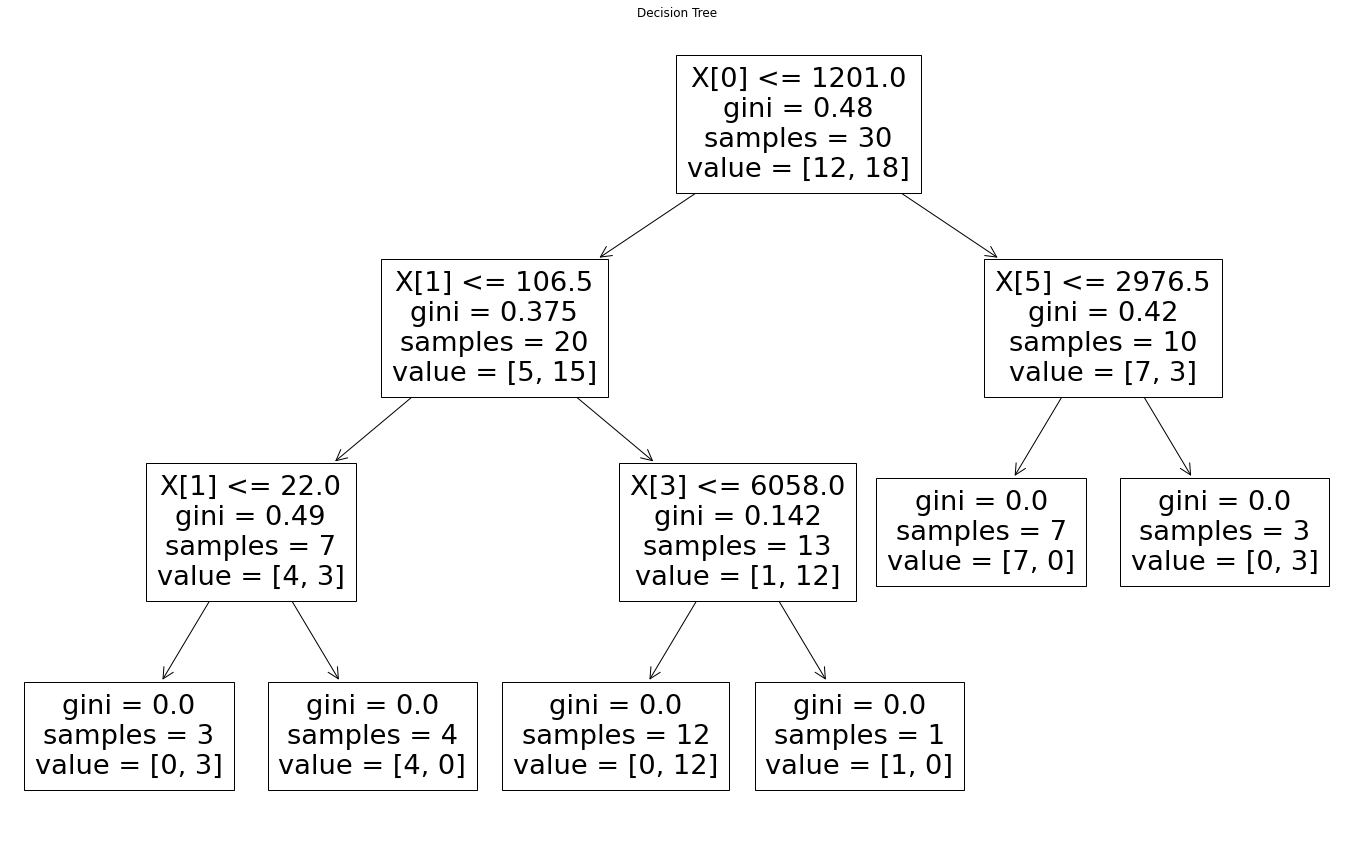

In [ ]:
plt.figure(figsize=(24,15))
tree.plot_tree(my_decision_tree) 
plt.title('Decision Tree')
plt.show()

# ***Testing the performance of the decision tree.***

In [ ]:
# function for testing the decision tree

# 0 - computers, 1 - cars.
def test_tree(text):
  encoded = my_tokenizer.encode(text, return_tensors="pt").cpu().data.numpy()
  item = np.array(encoded[0])

  x_test = np.zeros((1,30))

  for i in range (0, item.shape[0]):
    x_test[0,i] = item[i]
  result = my_decision_tree.predict(x_test)
  return result

In [ ]:
for i in range (0, len(test)):
  print(test[i])
  print(test_tree(test[i]))

German Vehicles are fast
[0]
Computers are cool
[0]
Cars are hot
[1]
i have a fast processor
[0]


# ***Decision Tree Result***

### Here as we can see decision tree is providing decent results, although not entirely accurate.

### Out of the 4 test sentences it was able to classify 3 of them correctly.



# ***Conclusion***

Clearly Deep Learning performed better than decision tree.